In [23]:
import pandas as pd
import numpy as np

import seaborn as sns

In [13]:
df_train = pd.read_csv("C:/Saurabh/mlops ineuron/End to End Project/data/train.csv") 
df_test = pd.read_csv("C:/Saurabh/mlops ineuron/End to End Project/data/test.csv") 

In [12]:
df_train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [16]:
df_train.shape, df_test.shape

((193573, 11), (129050, 10))

In [21]:
df_train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [22]:
df_train.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


<Axes: ylabel='price'>

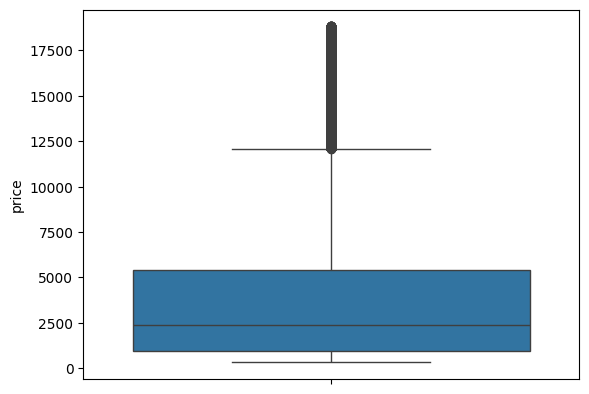

In [25]:
sns.boxplot(df_train.price)

In [33]:
df_train[df_train.price > 12000].sort_values(by=["price"], ascending=False).head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
180559,180559,2.15,Premium,E,SI2,61.7,58.0,8.34,8.31,5.10,18818
153958,153958,2.00,Very Good,F,SI1,59.2,60.0,8.09,8.14,4.86,18818
9224,9224,2.00,Very Good,G,SI1,63.5,56.0,8.03,7.97,5.05,18818
59270,59270,2.29,Premium,G,SI1,62.6,57.0,8.37,8.33,5.23,18818
123163,123163,1.70,Ideal,G,VS1,61.7,55.0,7.70,7.60,4.73,18818


In [35]:
df_train.cut.unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [36]:
df_train.color.unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [37]:
df_train.clarity.unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [51]:
x_train = df_train.drop(['id', 'price'], axis=1)
y_train = df_train["price"]

In [53]:
x_train.head(2)

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05


In [57]:
y_train.head(2)

0    13619
1    13387
Name: price, dtype: int64

In [59]:
x_train = pd.get_dummies(x_train, drop_first=True, dtype=int)
x_train.head(2)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.52,62.2,58.0,7.27,7.33,4.55,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2.03,62.0,58.0,8.06,8.12,5.05,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [66]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [70]:
lr = LinearRegression()
lr.fit(x_train, y_train)
preds = lr.predict(x_train)

print(r2_score(preds, y_train))
print(mean_squared_error(preds, y_train)**0.5)
print(mean_absolute_error(preds, y_train))


0.941261473849994
950.2594856629789
625.3851228846987
